# Preparation

## Import packages

In [1]:
import anndata
from src.extended_anndata import *
from scripts.add_glm_results import get_glm_results
import src.df_accessors
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Get data

In [6]:
adata = anndata.read_h5ad("proc/scquint/preprocessed_adata_three.h5ad")
adata = ExtendedAnnData(adata)
adata = adata.add_predictors()
adata.uns["simple"] = get_glm_results("proc/scquint/three/simple")
adata.uns["multiple"] = get_glm_results("proc/scquint/three/multiple")

ephys_props = pd.read_csv("data/ephys_data_sc.csv", index_col = 0).columns

Removing cells with more than 6 missing ephys properties
Imputing the rest of the missing ephys values with mean


/Users/xunuo/Library/CloudStorage/OneDrive-UniversityofToronto/projects/patch_seq_spl/src/extended_anndata.py:96: ImplicitModificationWarning: Setting element `.obsm['predictors']` of view, initializing view as actual.
  self.obsm["predictors"] = ephys_data


## Define functions

In [3]:
def get_n_non_zero_cell(adata, intron_group_list):
    return [np.count_nonzero(adata.X[:, adata[:, adata.var.intron_group == intron_group].var.index.astype(int)].toarray().sum(axis=1)) for intron_group in intron_group_list]

# Plotting

## Highly expressed genes

In [8]:
adata.uns["simple"]["gene_name"] = adata.uns["simple"]\
    .reset_index()\
    ["event_name"]\
    .str.split("_", expand = True)\
    .iloc[:, 0].values

<Axes: xlabel='mean_cpm', ylabel='n_sig'>

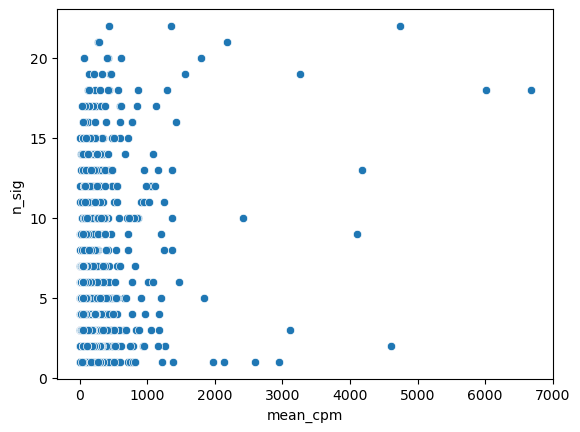

In [9]:
pd.concat([adata.uns["simple"]["gene_name"], adata.uns["simple"].loc[:, ephys_props].apply(lambda x: (x < 0.05)).sum(axis = 1)], axis=1)\
    .rename(columns = {0: "n_sig"})\
    .sort_values(by=["gene_name", "n_sig"], ascending=[True, False])\
    .groupby("gene_name").first().reset_index()\
    .query("n_sig > 0")\
    .pipe(
        pd.merge, 
        adata.obsm["predictors"].select_dtypes(include=[np.number]).T.mean(axis=1).to_frame(), 
        left_on = "gene_name", right_index = True, how = "left")\
    .rename(columns = {0: "mean_cpm"})\
    .pipe(sns.scatterplot, x = "mean_cpm", y = "n_sig")

<Axes: xlabel='mean_cpm', ylabel='n_sig'>

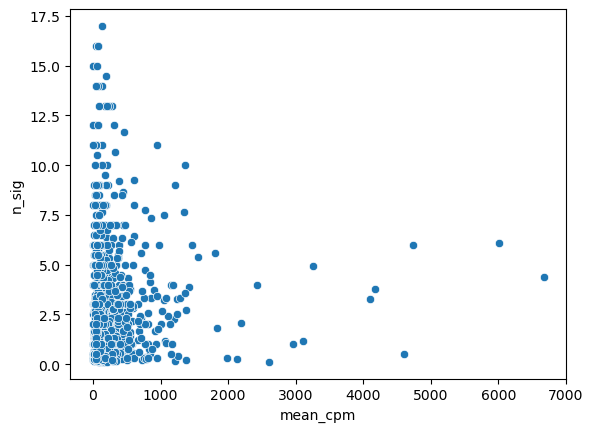

In [10]:
pd.concat([adata.uns["simple"]["gene_name"], adata.uns["simple"].loc[:, ephys_props].apply(lambda x: (x < 0.05)).sum(axis = 1)], axis=1)\
    .rename(columns = {0: "n_sig"})\
    .sort_values(by=["gene_name", "n_sig"], ascending=[True, False])\
    .groupby("gene_name").mean().reset_index()\
    .query("n_sig > 0")\
    .pipe(
        pd.merge, 
        adata.obsm["predictors"].select_dtypes(include=[np.number]).T.mean(axis=1).to_frame(), 
        left_on = "gene_name", right_index = True, how = "left")\
    .rename(columns = {0: "mean_cpm"})\
    .pipe(sns.scatterplot, x = "mean_cpm", y = "n_sig")

In [11]:
temp = pd.concat([adata.uns["simple"]["gene_name"], adata.uns["simple"].loc[:, ephys_props].apply(lambda x: (x < 0.05)).sum(axis = 1)], axis=1)\
    .iloc[np.arange(10), :]\
    .apply(lambda x: get_n_non_zero_cell(adata, x.index.to_list()))

In [12]:
temp

,gene_name,0
event_name,,
A230006K03Rik_7_60852015_-,1557,1557
A230006K03Rik_7_60852738_-,1566,1566
A230006K03Rik_7_60871681_-,1009,1009
A230006K03Rik_7_60883335_-,128,128
A230006K03Rik_7_60926289_-,1644,1644
A230006K03Rik_7_60932577_-,2020,2020
A230006K03Rik_7_60940002_-,2096,2096
A230057D06Rik_7_61356601_-,167,167
A230057D06Rik_7_61561222_-,673,673
